In [1]:
from autumn.tools.project import get_project
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
# from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

from autumn.tools.plots.uncertainty.plots import _get_target_values, _plot_targets_to_axis

In [2]:
project = get_project("sm_sir", "national-capital-region")

In [3]:
update_params = {

}
params = project.param_set.baseline.update(update_params, calibration_format=True)


In [4]:
model = project.run_baseline_model(params)
derived_df = model.get_derived_outputs_df()

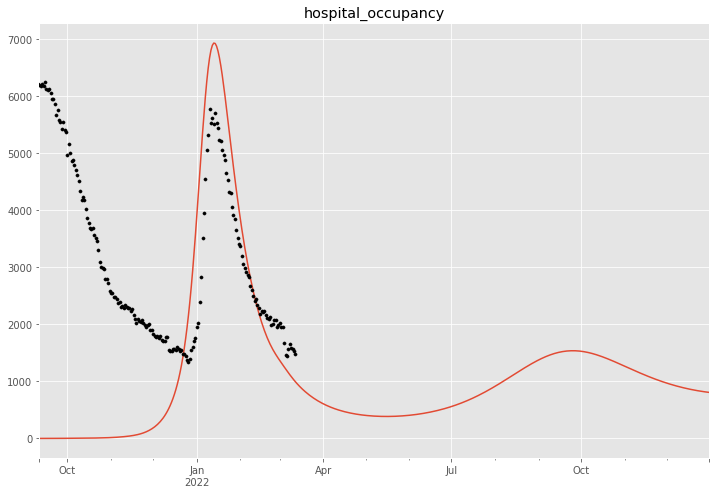

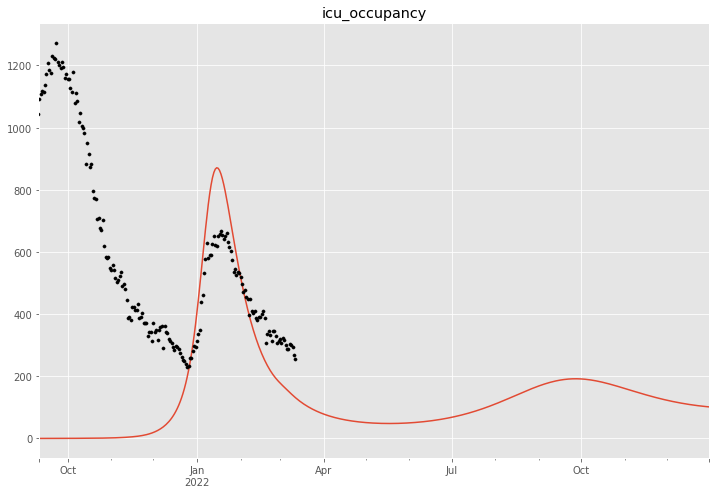

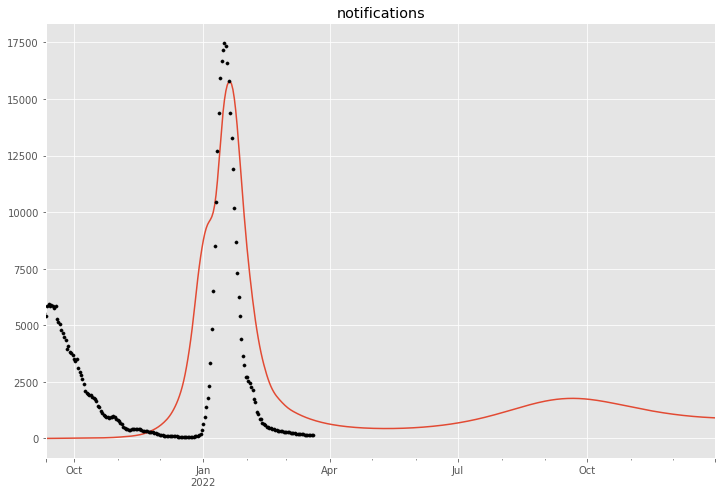

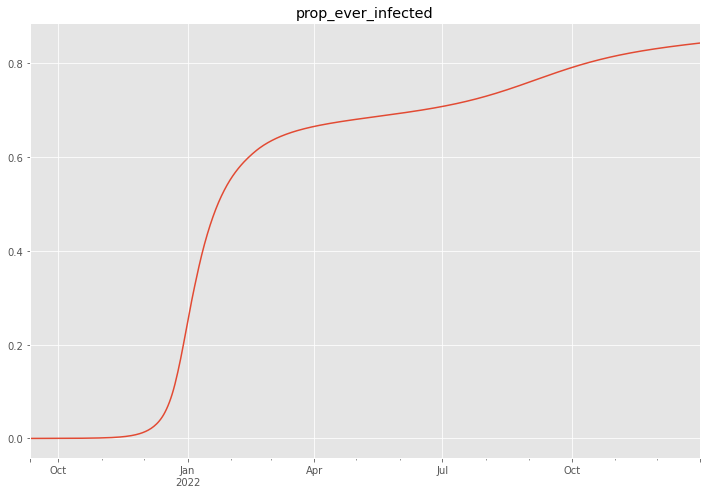

In [5]:
outputs = ["hospital_occupancy", "icu_occupancy", "notifications", "prop_ever_infected"] #, "hospital_admissions", "hospital_occupancy", "icu_admissions", "icu_occupancy"]
for output in outputs:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()

    axis = derived_df[output].plot()
    axis.set_title(output)
    
    if output in project.plots:
        values, times = _get_target_values(project.plots, output)        
        date_times = pd.to_datetime(times, origin="01Jan2020",unit="D") 
        _plot_targets_to_axis(axis, values, date_times, on_uncertainty_plot=True)
         
